# Removing outliers - outlier trimming

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [4]:
def find_limits(df, variable, fold):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - (IQR * fold)
    upper_limit = q3 + (IQR * fold)

    return lower_limit, upper_limit

In [5]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-3.925900000000002, 11.232600000000001)

In [6]:
# Remove outliers on the right

inliers = X_train["MedInc"].ge(lower_limit)
train_t = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
test_t = X_test.loc[inliers]

In [7]:
# Remove outliers on the left

inliers = X_train["MedInc"].le(upper_limit)
train_t = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
test_t = X_test.loc[inliers]

In [8]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [9]:
train_t.shape, test_t.shape

((14348, 8), (6151, 8))

## Feature-engine

In [10]:
trimmer = OutlierTrimmer(
    variables=["MedInc", "HouseAge", "Population"],
    capping_method="iqr",
    tail="both",
    fold=1.5,
)

trimmer.fit(X_train)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['MedInc', 'HouseAge', 'Population'])

In [11]:
trimmer.left_tail_caps_

{'MedInc': -0.6776500000000012, 'HouseAge': -10.5, 'Population': -626.0}

In [12]:
trimmer.right_tail_caps_

{'MedInc': 7.984350000000001, 'HouseAge': 65.5, 'Population': 3134.0}

In [13]:
train_t = trimmer.transform(X_train)
test_t = trimmer.transform(X_test)

In [14]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [15]:
train_t.shape, test_t.shape

((13165, 8), (5619, 8))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_and_hist(data, variable):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)
    plt.show()

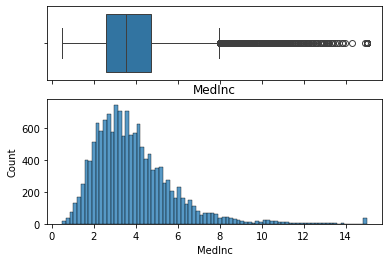

In [17]:
plot_boxplot_and_hist(X_train, "MedInc")

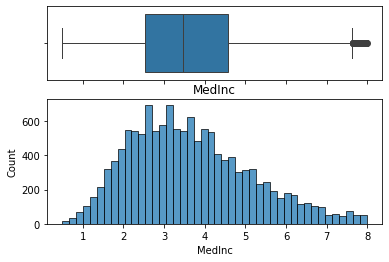

In [18]:
plot_boxplot_and_hist(train_t, "MedInc")